In [1]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto(device_count = {'CPU' : 1, 'GPU' : 1}) #device_count = {'CPU' : 1, 'GPU' : 1}
config.gpu_options.allow_growth = True #dynamically grow the memory used on the GPU
config.log_device_placement = True # to log device placement (onn which device the operation ran)

sess = tf.Session(config=config)
set_session(sess) # set this Tensorflow session as the default session for Keras

Using TensorFlow backend.


In [2]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
#from matplotlib import image


In [3]:
model = ResNet50(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.


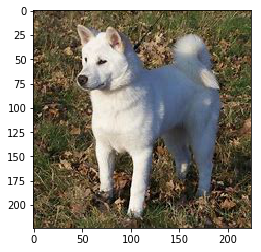

Predicted:
Eskimo_dog       34.45 %
Samoyed       30.93 %
Siberian_husky       10.77 %


In [5]:
img_path = '/workspace/dataset/images/th.jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
#x = x.astype('float32')
#x /= 255.0
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
#print('Predicted:', decode_predictions(preds, top=3)[0])
preds_top3 = decode_predictions(preds, top=3)[0]

imgplot = plt.imshow(img)
plt.show()

print('Predicted:')
print(preds_top3[0][1], '     ',  '%.2f' % (preds_top3[0][2] * 100), '%' )
print(preds_top3[1][1], '     ',  '%.2f' % (preds_top3[1][2] * 100), '%' )
print(preds_top3[2][1], '     ',  '%.2f' % (preds_top3[2][2] * 100), '%' )